In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn .combine import SMOTETomek
from collections import Counter

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# EDA and Visualization

array([[<AxesSubplot:title={'center':'Taxable.Income'}>]], dtype=object)

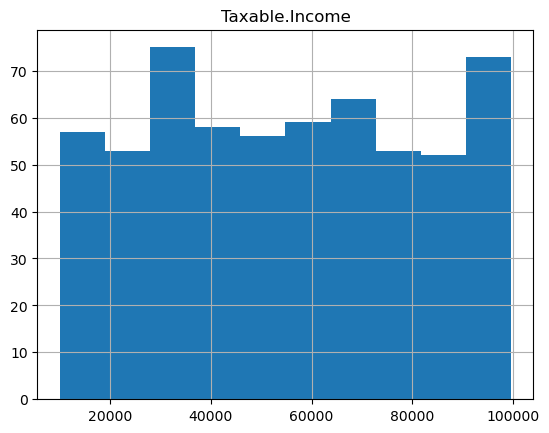

In [9]:
data.hist('Taxable.Income')

# divide the taxable income < 30000 as risky = 0 and >30000 as good =1

In [10]:
#converting our Taxable data to categorical column

data1 = data.copy()
data1['Taxable_Income_cat']  = pd.cut(x = data['Taxable.Income'],bins = [0,30000,99700],labels = ['Risky','Good'],right = False)
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
#checking with taxable income value counts
data1.Taxable_Income_cat.value_counts()

Good     476
Risky    124
Name: Taxable_Income_cat, dtype: int64

In [12]:
#converting urban to unique value where no = 0 and yes= 1
label_encoder = preprocessing.LabelEncoder()
data1['Urban'] = label_encoder.fit_transform(data1['Urban'])

In [13]:
#checking with urban value counts
data1.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [14]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income_cat
0,NO,Single,68833,50047,10,1,Good
1,YES,Divorced,33700,134075,18,1,Good
2,NO,Married,36925,160205,30,1,Good
3,YES,Single,50190,193264,15,1,Good
4,NO,Married,81002,27533,28,0,Good


In [15]:
#converting undergrad to unique value where no = 0 and yes= 1
label_encoder = preprocessing.LabelEncoder()
data1['Undergrad'] = label_encoder.fit_transform(data1['Undergrad'])

In [16]:
data1.Undergrad.value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [17]:
#converting marital to unique value where no = 0 and yes= 1
label_encoder = preprocessing.LabelEncoder()
data1['Marital.Status'] = label_encoder.fit_transform(data1['Marital.Status'])

In [18]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [19]:
#renaming the columns
data1 = data1.rename({'Marital.Status':'MaMarital Status','Work.Experience':'Work Experience','Taxable.Income':'Taxable Income'},axis = 1)
data1.head()

,Undergrad,MaMarital Status,Taxable Income,City.Population,Work Experience,Urban,Taxable_Income_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [20]:
data1.corr()

,Undergrad,MaMarital Status,Taxable Income,City.Population,Work Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
MaMarital Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


<AxesSubplot:>

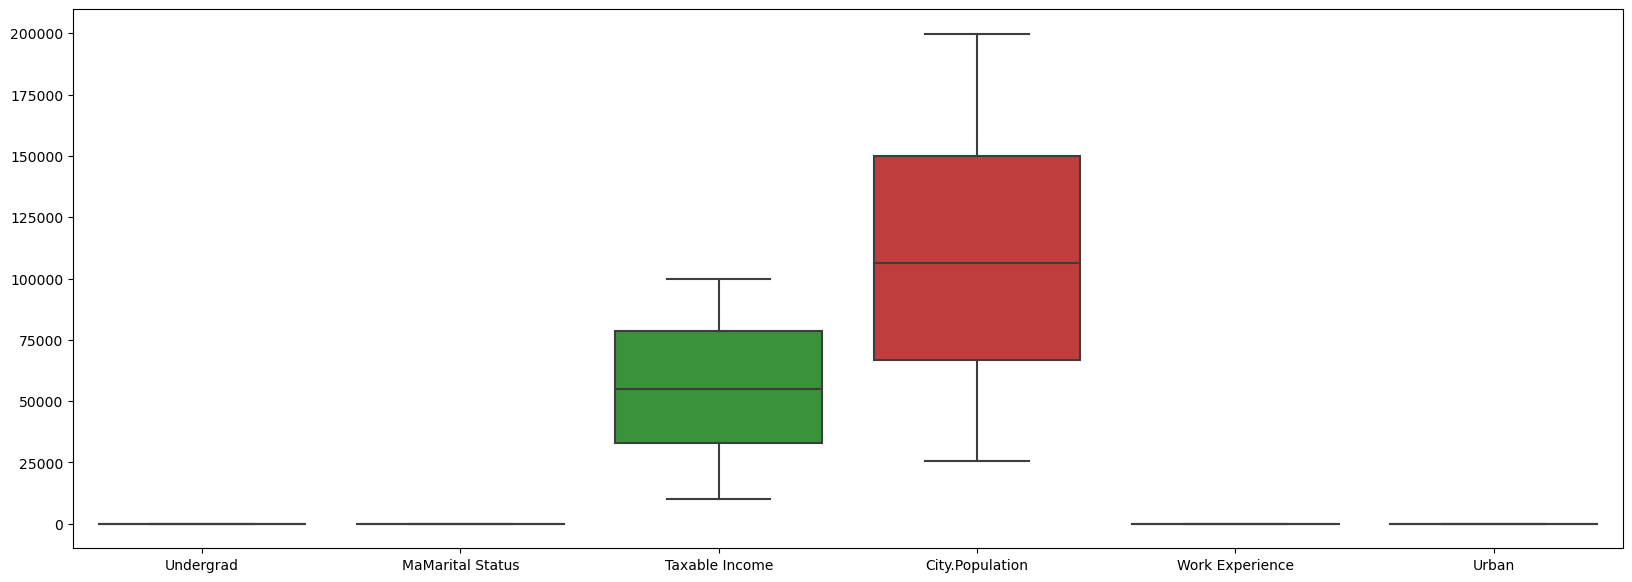

In [21]:
#checking for any outliers
plt.figure(figsize=(20,7))
sns.boxplot(data = data1)

In [22]:
data1.Taxable_Income_cat.value_counts()

Good     476
Risky    124
Name: Taxable_Income_cat, dtype: int64

In [23]:
data1.head()

,Undergrad,MaMarital Status,Taxable Income,City.Population,Work Experience,Urban,Taxable_Income_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


Text(0, 0.5, 'frequency')

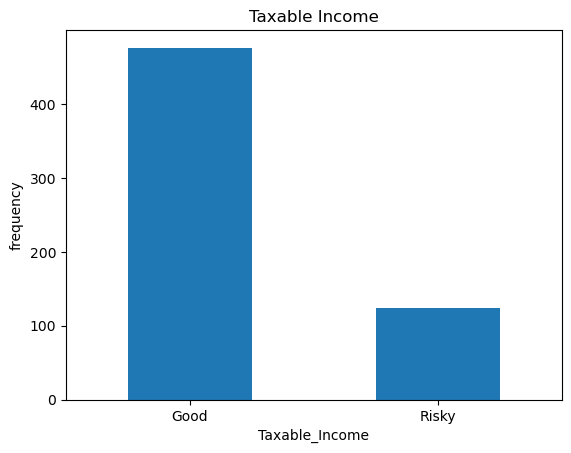

In [24]:
#checking balance of taxable income car feature
count_classes = pd.value_counts(data1['Taxable_Income_cat'],sort = True)
count_classes.plot(kind = 'bar',rot = 0)
plt.title('Taxable Income')
plt.xticks(range(2))
plt.xlabel('Taxable_Income')
plt.ylabel("frequency")

In [25]:
Risky = data1[data1['Taxable_Income_cat']==1]
Good = data1[data1['Taxable_Income_cat']==0]
print(Risky.shape,Good.shape)

(0, 7) (0, 7)


# Balancing data using smote tomek from imbalance learn

In [26]:
#splitting our data into x and y
x = data1.iloc[:,0:6]
y = data1['Taxable_Income_cat']

In [27]:
smk = SMOTETomek(random_state=42)
x_res,y_res = smk.fit_resample(x,y)

In [28]:
x_res.shape,y_res.shape

((950, 6), (950,))

In [29]:
print('original dataset shape {} '.format(Counter(y)))
print('original dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({'Good': 476, 'Risky': 124}) 
original dataset shape Counter({'Good': 475, 'Risky': 475})


In [30]:
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res,y_res,test_size=0.25,random_state=42)

# Pre-pruning for decision tree

In [31]:
param_grid = {'max_features':['auto','sqrt','log2','None'],
             'ccp_alpha':[0.1,.01,0.001],
             'max_depth':[3,4,5,6,7,8],
             'criterion':['gini','entropy']}

#fitting our model with gridsearch cv
model1 = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model1,param_grid=param_grid,cv=5,verbose=True)
grid_search.fit(x_res_train,y_res_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 281, in fit
    raise ValueError(
ValueError: Invalid value for max_features. Allowed string values are 'auto', 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2', 'None']},
             verbose=True)

In [32]:
#locating our best parameters
grid_search.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto'}

In [33]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       random_state=42)

# building our Decision tree

In [34]:
model2 = DecisionTreeClassifier(ccp_alpha=0.001, criterion='gini',max_depth=8,random_state=42,max_features='auto')
model2.fit(x_res_train,y_res_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       random_state=42)

[Text(0.22453703703703703, 0.9375, 'X[4] <= 24.5\ngini = 0.5\nsamples = 712\nvalue = [351, 361]'),
 Text(0.07407407407407407, 0.8125, 'X[2] <= 29982.5\ngini = 0.496\nsamples = 572\nvalue = [262, 310]'),
 Text(0.037037037037037035, 0.6875, 'gini = 0.0\nsamples = 310\nvalue = [0, 310]'),
 Text(0.1111111111111111, 0.6875, 'gini = 0.0\nsamples = 262\nvalue = [262, 0]'),
 Text(0.375, 0.8125, 'X[0] <= 0.5\ngini = 0.463\nsamples = 140\nvalue = [89, 51]'),
 Text(0.18518518518518517, 0.6875, 'X[2] <= 28703.5\ngini = 0.489\nsamples = 82\nvalue = [47, 35]'),
 Text(0.14814814814814814, 0.5625, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.2222222222222222, 0.5625, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(0.5648148148148148, 0.6875, 'X[4] <= 28.5\ngini = 0.4\nsamples = 58\nvalue = [42, 16]'),
 Text(0.2962962962962963, 0.5625, 'X[3] <= 69076.0\ngini = 0.42\nsamples = 40\nvalue = [28, 12]'),
 Text(0.25925925925925924, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3333

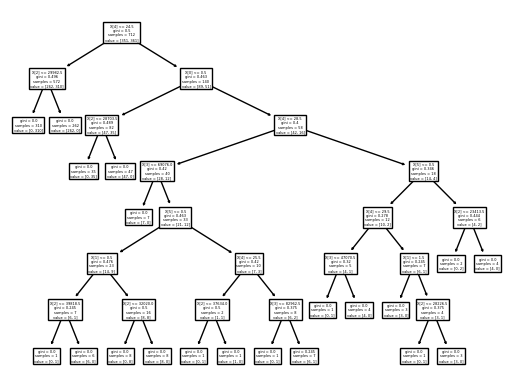

In [35]:
#plot the decision tree
tree.plot_tree(model2)

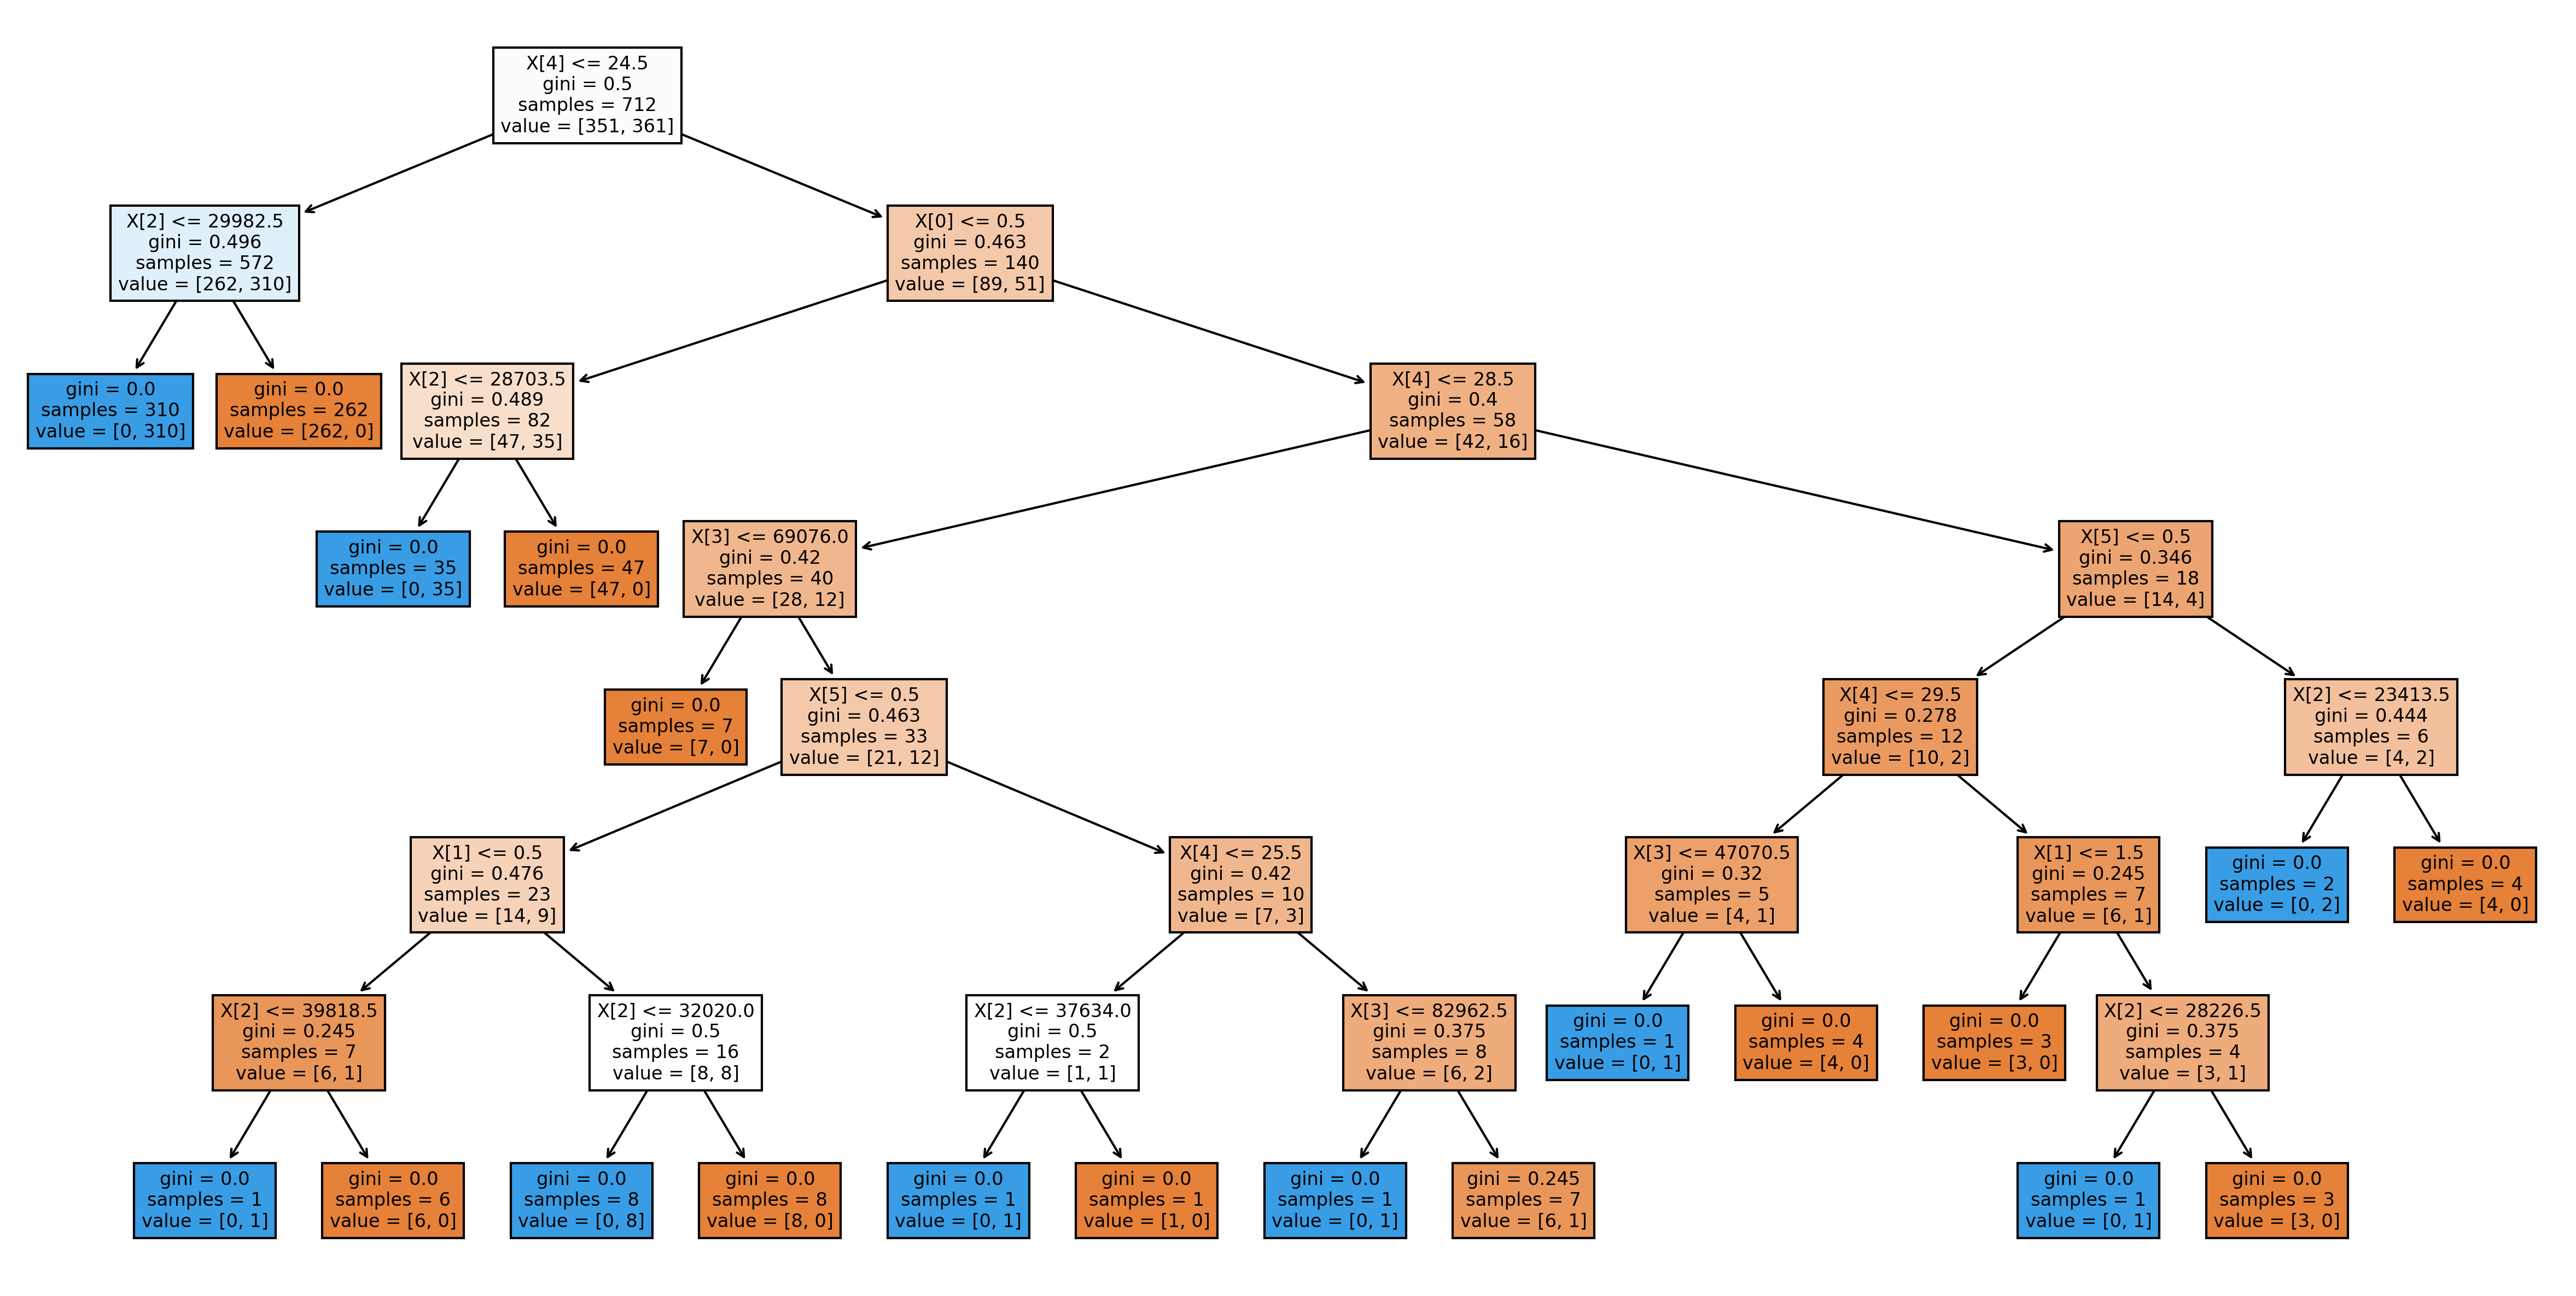

In [36]:
plt.figure(figsize=(20,10),dpi = 300)
tree.plot_tree(model2,filled = True)
plt.show()

In [37]:
print(tree.export_text(model2))

|--- feature_4 <= 24.50
|   |--- feature_2 <= 29982.50
|   |   |--- class: Risky
|   |--- feature_2 >  29982.50
|   |   |--- class: Good
|--- feature_4 >  24.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 28703.50
|   |   |   |--- class: Risky
|   |   |--- feature_2 >  28703.50
|   |   |   |--- class: Good
|   |--- feature_0 >  0.50
|   |   |--- feature_4 <= 28.50
|   |   |   |--- feature_3 <= 69076.00
|   |   |   |   |--- class: Good
|   |   |   |--- feature_3 >  69076.00
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 39818.50
|   |   |   |   |   |   |   |--- class: Risky
|   |   |   |   |   |   |--- feature_2 >  39818.50
|   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_2 <= 32020.00
|   |   |   |   |   |   |   |--- class: Risky
|   |   |   |   |   |   |--- feature_2 >  32020.00
|   |   |   |   |   |   |   |--- class: Good
| 

In [38]:
preds = model2.predict(x_res_test)
pd.Series(preds).value_counts()

Good     125
Risky    113
dtype: int64

In [39]:
preds

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Goo

In [40]:
pd.crosstab(y_res_test,preds)

col_0,Good,Risky
Taxable_Income_cat,,
Risky,2,112
Good,123,1


In [41]:
#checking the accuracy score with
accuracy_score(y_res_test,preds)

0.9873949579831933

# post pruning process

In [42]:
#using complexity purning path checking for impurities and alphas
path = model2.cost_complexity_pruning_path(x_res_train,y_res_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [43]:
ccp_alphas

array([0.        , 0.00053505, 0.00116372, 0.00117041, 0.00202871,
       0.0024077 , 0.00309997, 0.02926295, 0.20441497])

In [45]:
models = []
for ccp_alpha in ccp_alphas:
    model2 = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha,criterion='gini')
    model2.fit(x_res_train,y_res_train)
    models.append(model2)
    print('no of nodes in last tree is: {} with ccp_alphas: {}'.format
         (models[-1].tree_.node_count,ccp_alphas[-1]))

no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574
no of nodes in last tree is: 3 with ccp_alphas: 0.2044149706025574


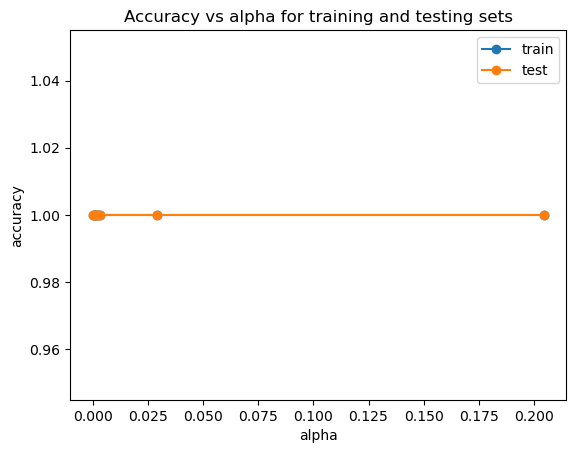

In [47]:
#plotting for accuracy vs alpha for training and test
train_scores = [model2.score(x_res_train,y_res_train) for model2 in models]
test_scores = [model2.score(x_res_test,y_res_test) for model2 in models]

fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle = 'steps-post')
ax.legend()
plt.show()

In [48]:
#finalzing the tree with given parameters

model3 = DecisionTreeClassifier(ccp_alpha=0.026,criterion='gini',max_depth=8,random_state=42,max_features='auto')

model3.fit(x_res_train,y_res_train)

DecisionTreeClassifier(ccp_alpha=0.026, max_depth=8, max_features='auto',
                       random_state=42)

[Text(0.5, 0.875, 'X[4] <= 24.5\ngini = 0.5\nsamples = 712\nvalue = [351, 361]'),
 Text(0.25, 0.625, 'X[2] <= 29982.5\ngini = 0.496\nsamples = 572\nvalue = [262, 310]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 310\nvalue = [0, 310]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 262\nvalue = [262, 0]'),
 Text(0.75, 0.625, 'X[0] <= 0.5\ngini = 0.463\nsamples = 140\nvalue = [89, 51]'),
 Text(0.625, 0.375, 'X[2] <= 28703.5\ngini = 0.489\nsamples = 82\nvalue = [47, 35]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(0.875, 0.375, 'gini = 0.4\nsamples = 58\nvalue = [42, 16]')]

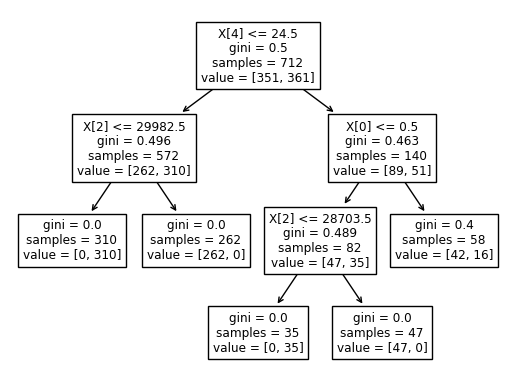

In [50]:
tree.plot_tree(model3)

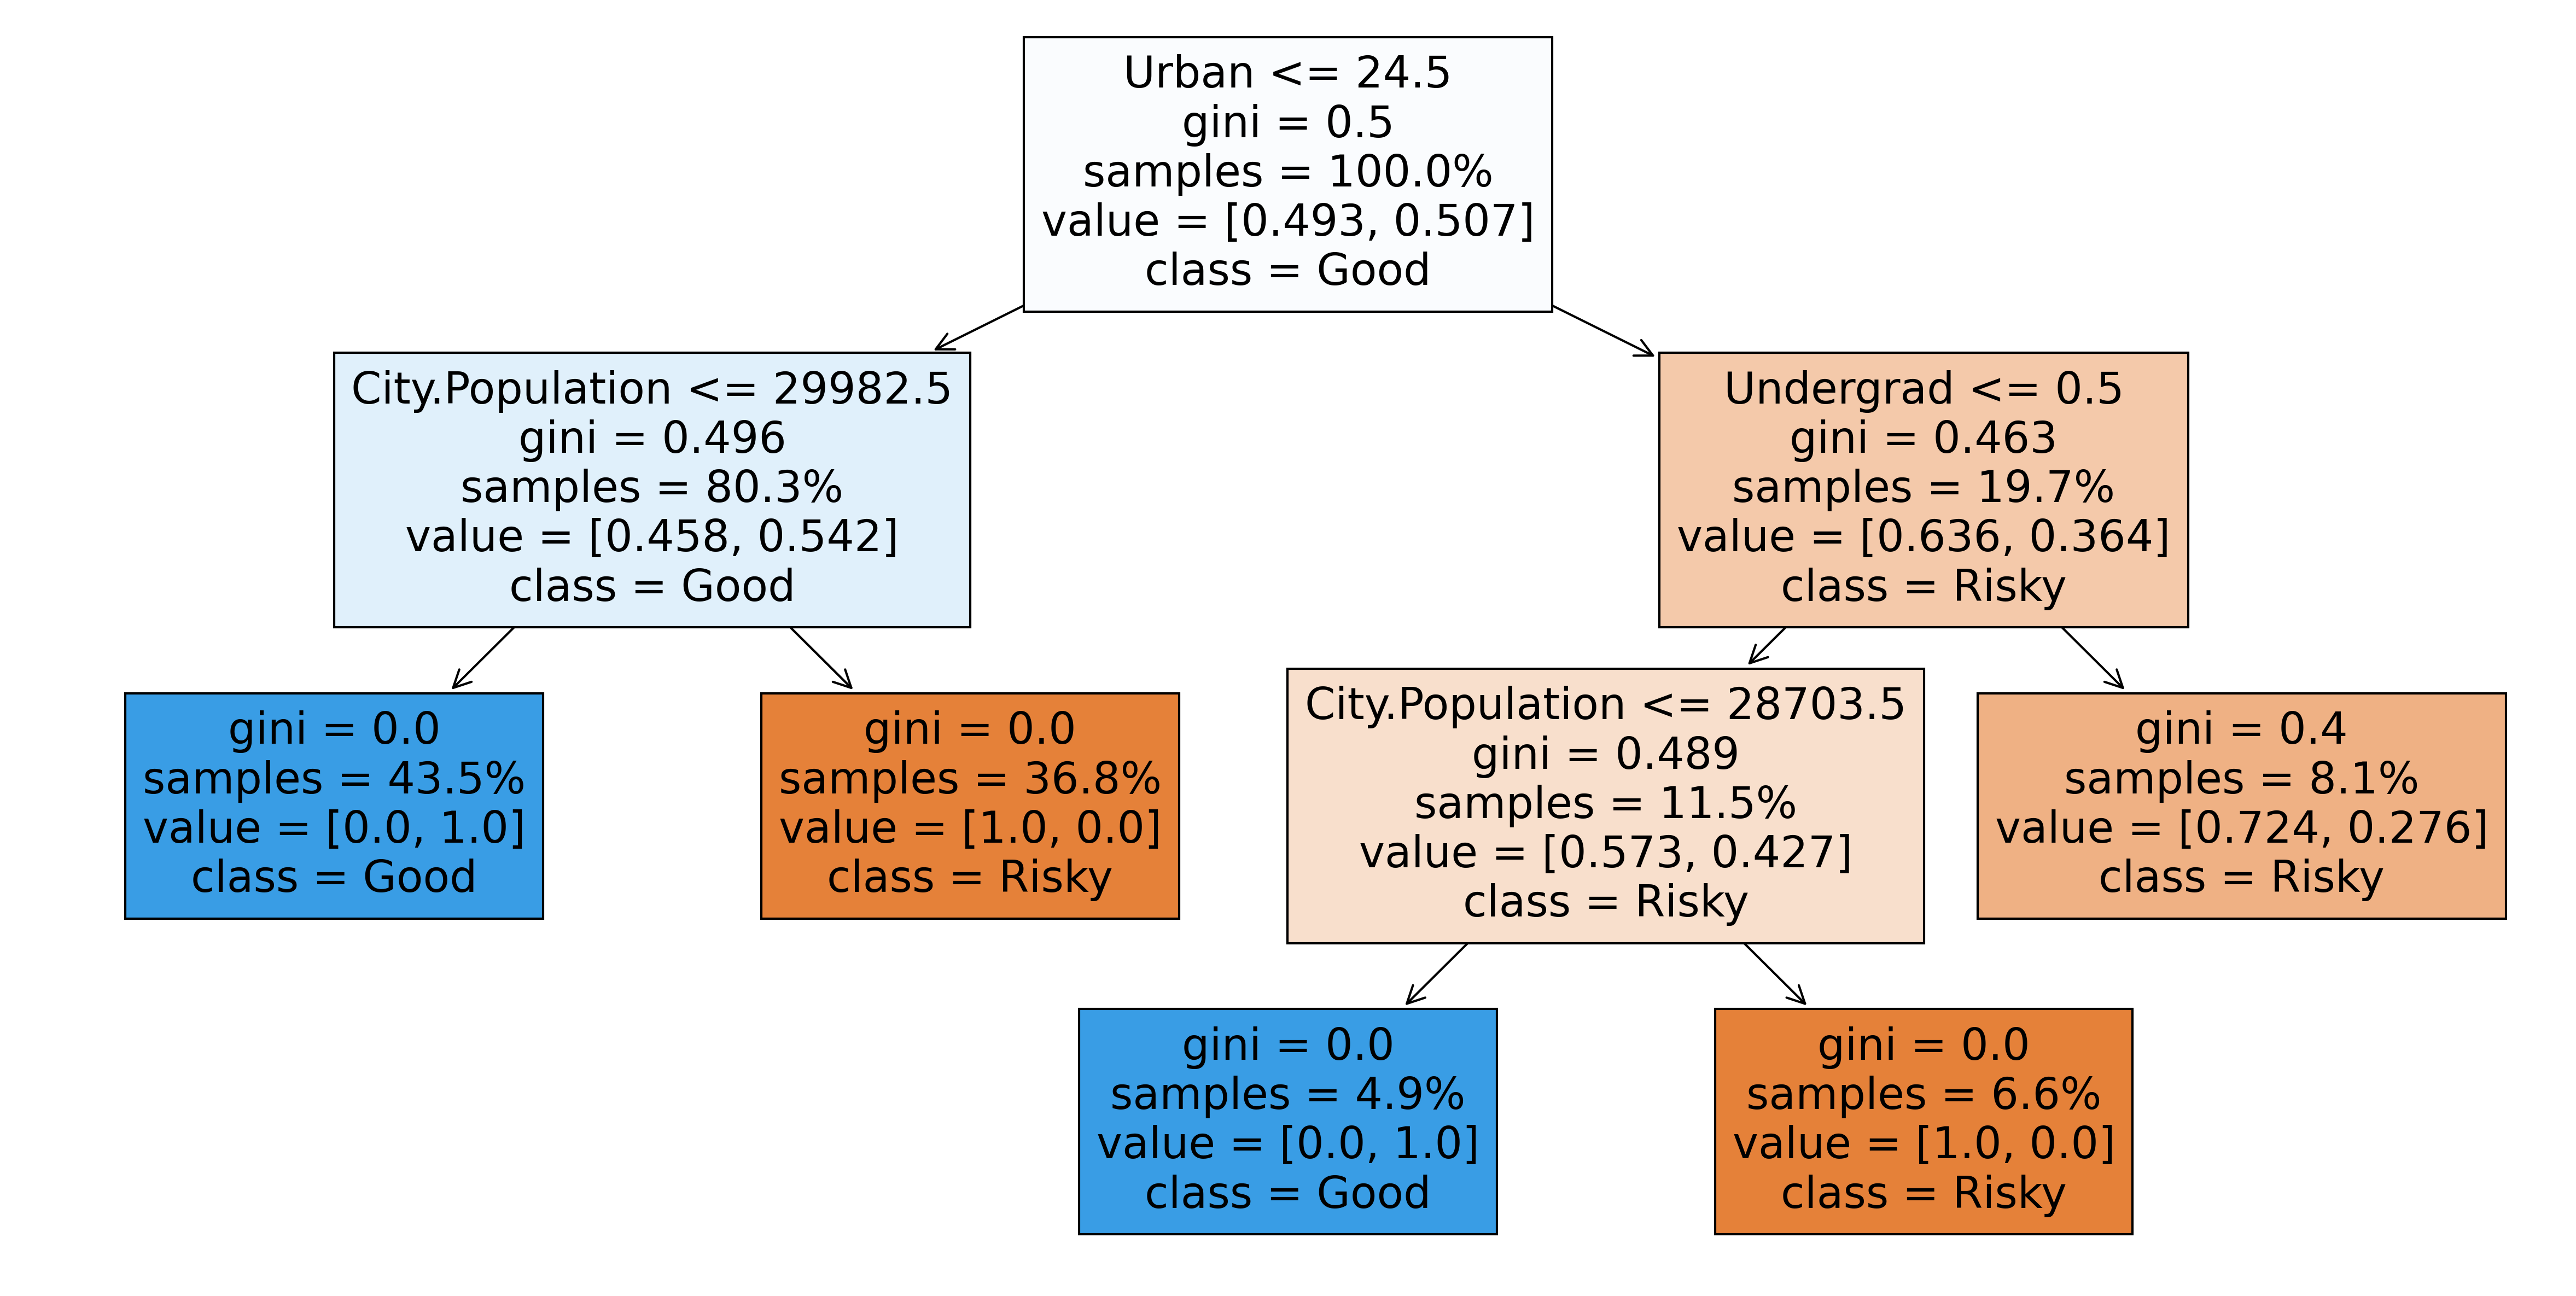

In [51]:
plt.figure(figsize=(20,10),dpi = 300)
tree.plot_tree(model3,filled = True,
              feature_names=['Undergrad' , 'Marital Status' , 'City.Population',
                            'Work Experience','Urban'],
              class_names = ['Risky','Good'],proportion = True,impurity = True)
plt.show()

In [52]:
data1.head()

,Undergrad,MaMarital Status,Taxable Income,City.Population,Work Experience,Urban,Taxable_Income_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [53]:
accuracy_score(y_res_test,preds)

0.9873949579831933